In [1]:
### THIS CELL SETS UP THE GOOGLE COLAB ENVIRONMENT. 
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:
    !pip install dataprob


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import dataprob

### Define model

This is the model we will use to describe our experimental data. dataprob will find parameters to the model consistent with our data. 

+ The function must take at least one float argument somewhere in its 
  definition. These arguments are the parameters that will be estimated. 

+ The function must return a numpy array the same length as the numpy array of 
  observations.


The cell below defines a linear model ($y = mx + b$)


In [3]:
def linear_model(m=0,b=0,x=None): 
    return m*x + b

### Generate some noisy data

This is a step that only exists for the example. For real analyses, `y_obs` and `y_std` would hold your experimental data. (See the [documentation](https://datatprob.readthedocs.io/)  for more information). 

In [4]:
# Observed data will have a slope of -5 and an intercept of 100
gen_params = {"m":-5,"b":100}

# Set up to collect 20 data points between -5 and 5, with an uncertainty on each 
# observation of 1
num_points = 20
x = np.linspace(-5,5,num_points)
err = np.random.normal(0,1,num_points)

# Generate y_obs and y_std. Make the estimated uncertainty larger than the
# noise to refuncertainty
y_obs = linear_model(x=x,**gen_params) + err
y_std = np.abs(err)*2

expt_df = pd.DataFrame({"y_obs":y_obs,
                        "y_std":y_std})


### Run analysis

This runs the whole analysis. We pass in `x` values as non-fittable parameters to our linear model, then fit values of `m` and `b`. 

In [5]:
# we need to send `x` into our model as a non-fittable parameter holding the 
# x-values for the line. 
x = np.linspace(-5,5,num_points)
non_fit_kwargs = {"x":x}

# Generate Fitter. (Set method to "bootstrap" or "mcmc" to see the other
# analysis methods in action). 
f = dataprob.setup(some_function=linear_model,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)

f.data_df = expt_df

# Run fit
f.fit()

# Show fit result dataframe
f.fit_df 

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
m,m,-5.020483,0.031675,-5.087312,-4.953653,0.0,False,-inf,inf,NaN,NaN
b,b,100.062294,0.122746,99.803322,100.321266,0.0,False,-inf,inf,NaN,NaN


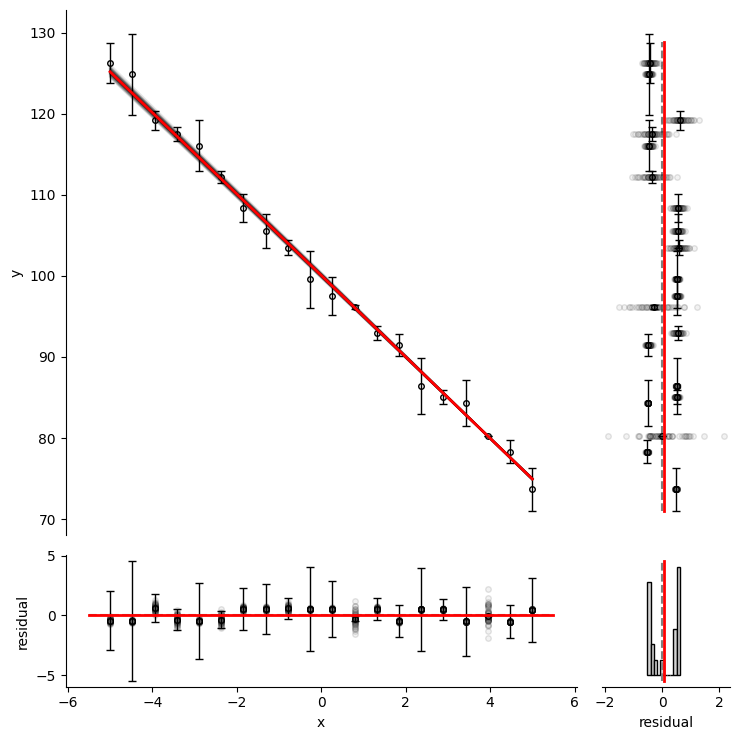

In [6]:
# Plot the summary and save as a pdf
fig = dataprob.plot_summary(f,
                            x_axis=x,
                            x_label="x",
                            y_label="y")
fig.savefig("summary-fig.pdf")

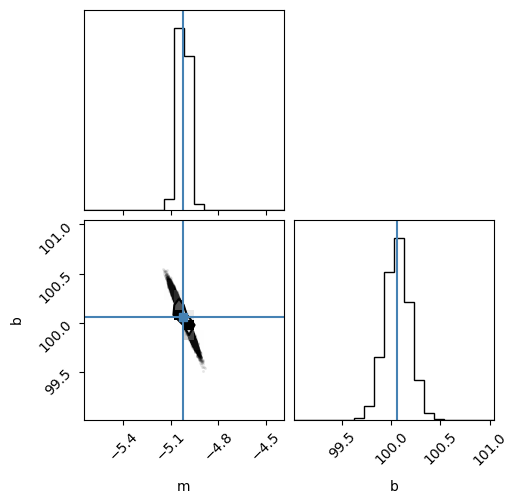

In [7]:
# Plot the corner plot and save as a pdf
fig = dataprob.plot_corner(f)
fig.savefig("corner-fig.pdf")

In [8]:
## Fit quality here

### Modify parameter guesses and bounds

In [9]:
x = np.linspace(-5,5,num_points)
non_fit_kwargs = {"x":x}

# Generate Fitter. (Set method to "bootstrap" or "mcmc" to see the other
# analysis methods in action). 
f = dataprob.setup(some_function=linear_model,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)
f.data_df = expt_df

f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
m,m,0.0,False,-inf,inf,NaN,NaN
b,b,0.0,False,-inf,inf,NaN,NaN


In [10]:
f.param_df.loc["m","guess"] = 10
f.param_df.loc["b","lower_bound"] = 95
f.param_df.loc["b","guess"] = 200
f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
m,m,10.0,False,-inf,inf,NaN,NaN
b,b,200.0,False,95.0,inf,NaN,NaN


In [11]:
f.fit()
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
m,m,-5.020483,0.031675,-5.087312,-4.953653,10.0,False,-inf,inf,NaN,NaN
b,b,100.062294,0.122746,99.803322,100.321266,200.0,False,95.0,inf,NaN,NaN


### Run an MCMC analysis

This analyzes the same data using the same model, but instead of finding the maximum likelihood paramter estimate, it uses a Bayesian sampling approach to find the posterior distribution of the parameters. 


100%|█████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.37it/s]


,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
m,m,-5.019158,0.044304,-5.108874,-4.933327,0.0,False,-inf,inf,NaN,NaN
b,b,100.056604,0.173743,99.724416,100.412074,0.0,False,-inf,inf,NaN,NaN


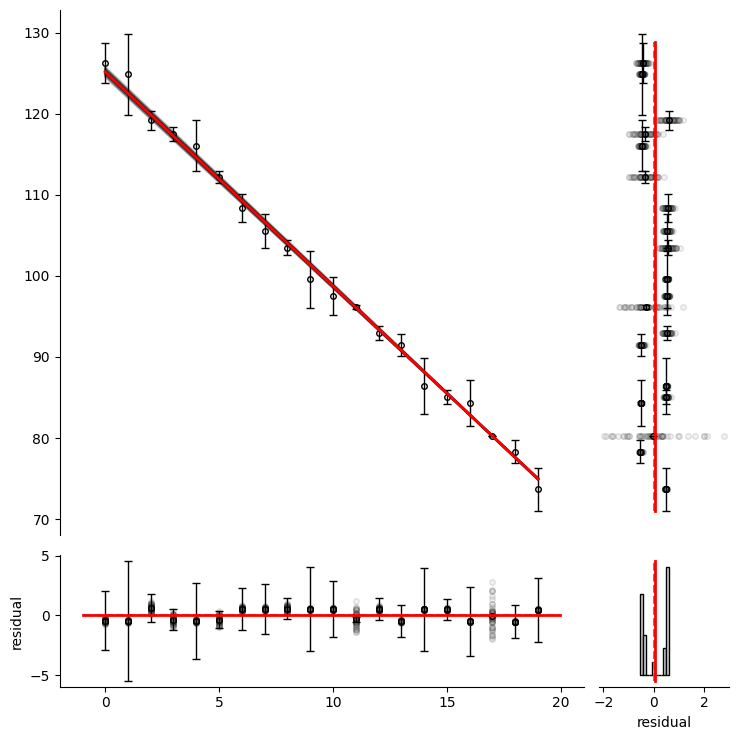

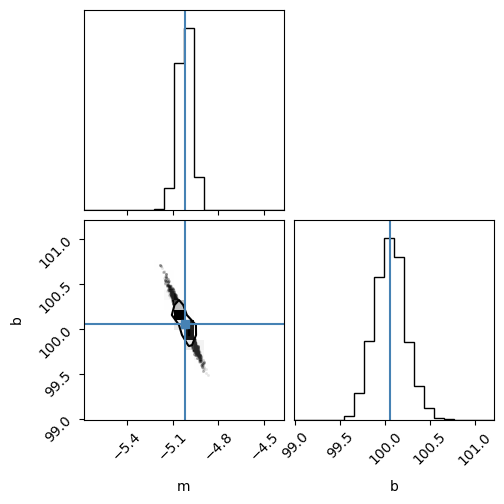

In [12]:
x = np.linspace(-5,5,num_points)
non_fit_kwargs = {"x":x}

# Select the "mcmc" method
f = dataprob.setup(some_function=linear_model,
                   method="mcmc", # <<<---
                   non_fit_kwargs=non_fit_kwargs)
f.data_df = expt_df

# Run fit
f.fit()

# Plot results
fig = dataprob.plot_summary(f)
fig = dataprob.plot_corner(f)
f.fit_df

### Set MCMC Priors

In [13]:
x = np.linspace(-5,5,num_points)
non_fit_kwargs = {"x":x}

# Select the "mcmc" method
f = dataprob.setup(some_function=linear_model,
                   method="mcmc", # <<<---
                   non_fit_kwargs=non_fit_kwargs)
f.data_df = expt_df
f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
m,m,0.0,False,-inf,inf,NaN,NaN
b,b,0.0,False,-inf,inf,NaN,NaN


In [14]:
f.param_df.loc["m","prior_mean"] = -5
f.param_df.loc["m","prior_std"] = 2
f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
m,m,0.0,False,-inf,inf,-5.0,2.0
b,b,0.0,False,-inf,inf,NaN,NaN


100%|█████████████████████████████████████████████████| 100/100 [00:01<00:00, 55.94it/s]


,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
m,m,-5.020757,0.045663,-5.112118,-4.931460,0.0,False,-inf,inf,-5.0,2.0
b,b,100.065335,0.174636,99.729250,100.408114,0.0,False,-inf,inf,NaN,NaN


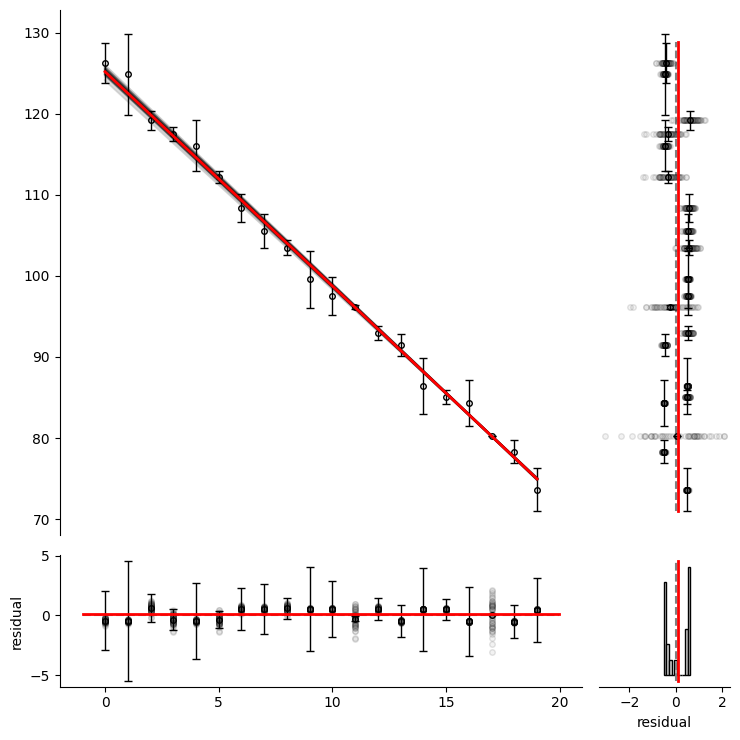

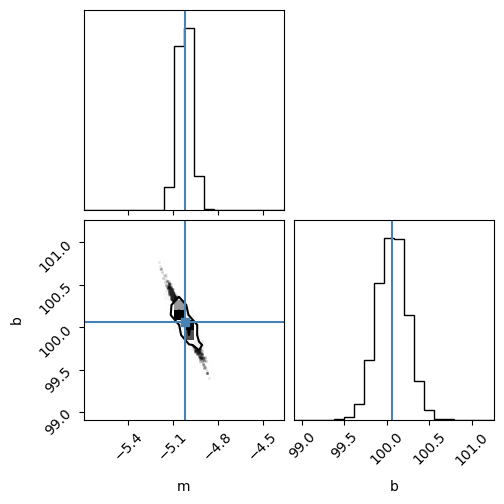

In [15]:
# Run fit
f.fit()

# Plot results
fig = dataprob.plot_summary(f)
fig = dataprob.plot_corner(f)
f.fit_df